In [1]:
!pip install kaggle
!kaggle datasets download -d mohamedharris/supermart-grocery-sales-retail-analytics-dataset
!unzip supermart-grocery-sales-retail-analytics-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset
License(s): copyright-authors
  0% 0.00/191k [00:00<?, ?B/s]
100% 191k/191k [00:00<00:00, 62.0MB/s]
Archive:  supermart-grocery-sales-retail-analytics-dataset.zip
  inflating: Supermart Grocery Sales - Retail Analytics Dataset.csv  


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State


In [3]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
sum(df.State == 'Tamil Nadu')

9994

In [4]:
df = df.drop(columns=['State'])
df = df.drop(columns=['Order ID'])
# Change the data type of 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'],format="mixed")

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()

df['Sales'].describe()

df['Discount'].describe()


count    9994.000000
mean        0.226817
std         0.074636
min         0.100000
25%         0.160000
50%         0.230000
75%         0.290000
max         0.350000
Name: Discount, dtype: float64

In [ ]:
df

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


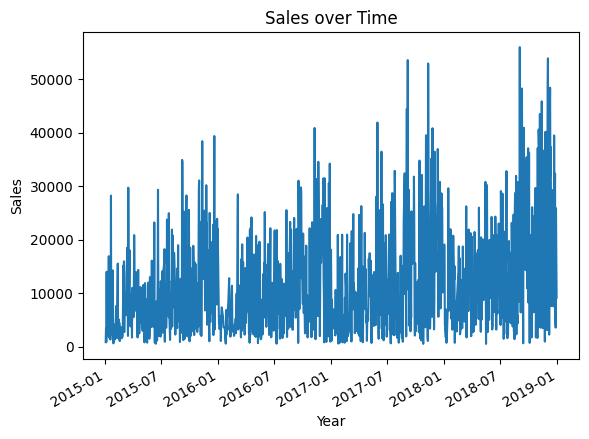

In [ ]:
sales_by_year = df.groupby('Order Date')['Sales'].sum()

sales_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()


Top 3 selling categories:
Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Name: Sales, dtype: int64


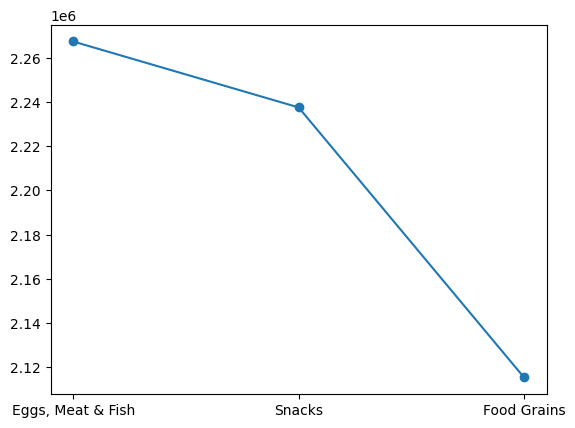

In [ ]:
grouped_df = df.groupby('Category')['Sales'].sum()

sorted_df = grouped_df.sort_values(ascending=False)

top_n = 3
print(f"Top {top_n} selling categories:")
print(sorted_df.head(top_n))
plt.plot(sorted_df.head(top_n),marker='o');

<Axes: ylabel='Sales'>

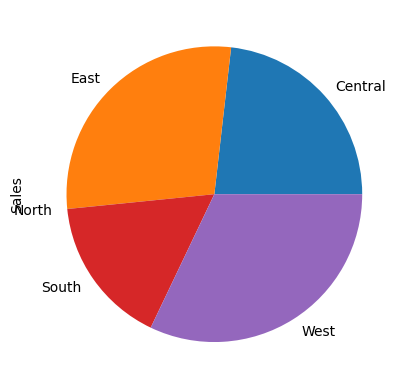

In [ ]:
# df.groupby('Category')['Sales'].sum().plot(kind='bar')

df.groupby('Region')['Sales'].sum().plot(kind='pie')


<Axes: xlabel='Region'>

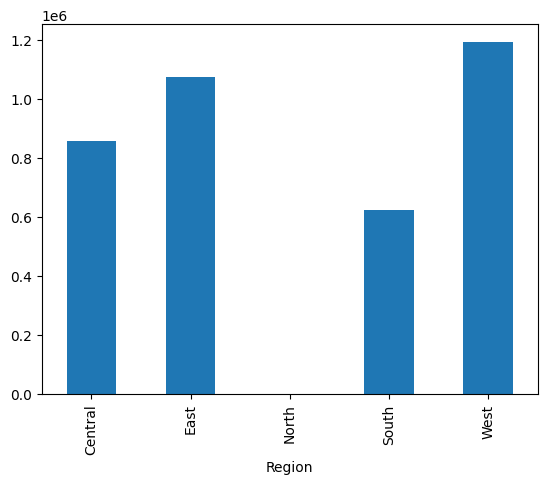

In [ ]:
df.groupby('Region')['Profit'].sum().plot.bar()

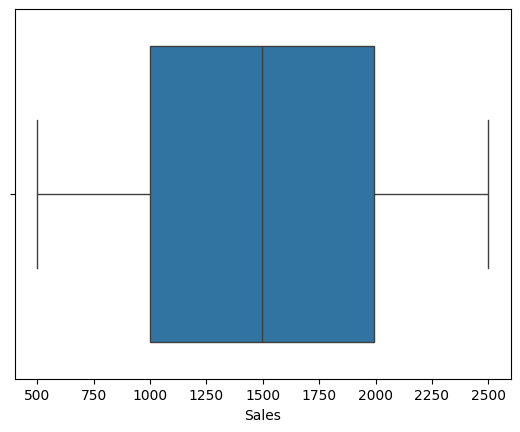

In [ ]:
sns.boxplot(df,x='Sales');

In [ ]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

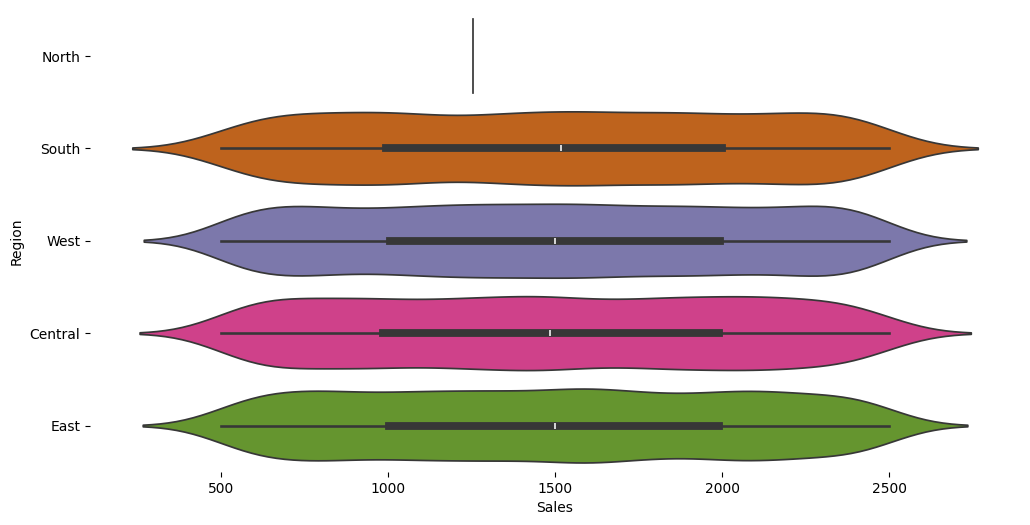

In [ ]:
figsize = (12, 1.2 * len(df['Region'].unique()))
plt.figure(figsize=figsize);
sns.violinplot(df, x='Sales', y='Region', inner='box', palette='Dark2');
sns.despine(top=True, right=True, bottom=True, left=True);

<Axes: xlabel='Category'>

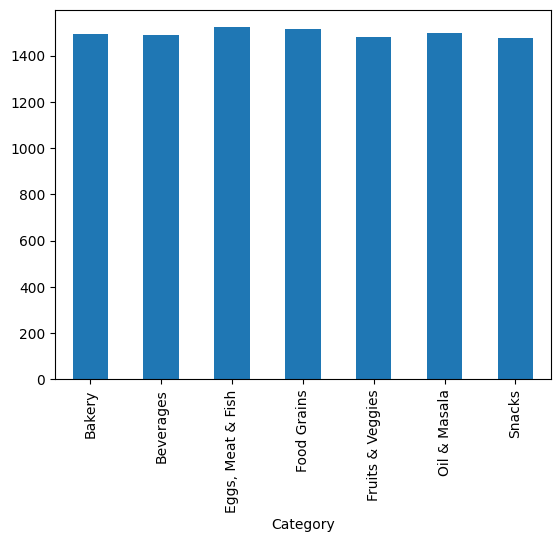

In [ ]:

# Create a bar chart showing average sales for each category.
df.groupby('Category')['Sales'].mean().plot.bar()

<Axes: xlabel='Order Date'>

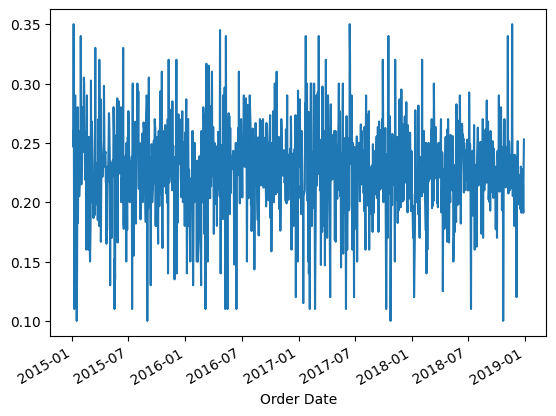

In [ ]:

# Create a line chart showing the trend of average discount over time.
df.groupby('Order Date')['Discount'].mean().plot.line()

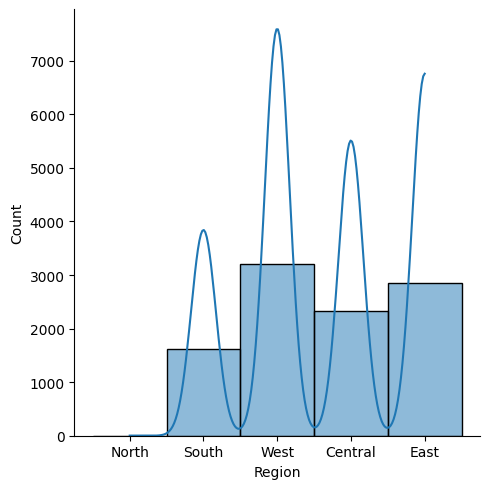

In [ ]:
sns.displot(df['Region'],kde=True)
plt.show()

In [ ]:
# prompt: Choose all the important visualizations and repare them to be ready for dashboard integration, use plotly, plotly animations (if applicable), potential markdowns etc.

### Sales over Time
import plotly.express as px

fig1 = px.line(sales_by_year.reset_index(), x='Order Date', y='Sales', title='Sales over Time')
fig1.update_layout(xaxis_tickformat="%d/%m/%Y")

### Top Selling Categories
import plotly.graph_objects as go

fig2 = go.Figure(data=[go.Bar(x=sorted_df.index, y=sorted_df.values, marker_color='#FFD700')])
fig2.update_layout(title='Top Selling Categories', xaxis_tickangle=-45)

### Sales by Region (Par Chart)
fig3 = px.bar(df.groupby('Region')['Sales'].sum().reset_index(), x='Region', y='Sales', title='Sales by Region')

### Profit by Region (Bar Chart)
fig4 = px.bar(df.groupby('Region')['Profit'].sum().reset_index(), x='Region', y='Profit', title='Profit by Region')

### Sales Distribution by Region (Violin Plot)
fig5 = px.violin(df, x='Sales', y='Region', title='Sales Distribution by Region')

### Create a dashboard
from plotly.subplots import make_subplots
from plotly.io import show

grid = make_subplots(rows=3, cols=2, subplot_titles=('', 'Top Selling Categories', 'Sales by Region', 'Profit by Region', 'Sales Distribution by Region', ''))

grid.add_trace(fig1.data[0], row=1, col=1)
grid.add_trace(fig2.data[0], row=1, col=2)
grid.add_trace(fig3.data[0], row=2, col=1)
grid.add_trace(fig4.data[0], row=2, col=2)
grid.add_trace(fig5.data[0], row=3, col=1)

grid.update_layout(height=1500, showlegend=False)

show(grid)


In [ ]:
df

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


In [ ]:
fig = px.scatter(df, x="Sales", y="Profit", animation_frame="Order Date", animation_group="Region",
           size="Profit", color="Region", facet_col="Region")
fig.show()

In [ ]:
fig = px.sunburst(df, path=['Region', 'City'], values='Profit',
                  color='Profit')
fig.show()

In [5]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.5 MB/s eta 0:00:00


In [6]:
df

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


In [15]:
#It is basic dash


app = dash.Dash(__name__)


fig_sales_over_time = px.sunburst(df, path=['Region', 'City'], values='Profit', color='Profit')

fig_top_selling_categories = px.bar(df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales')

fig_sales_by_region = px.pie(df.groupby('Region')['Sales'].sum().reset_index(), values='Sales', names='Region')


app.layout = html.Div(children=[
    html.H1(children='Supermart Grocery Sales Dashboard'),
    dcc.Graph(id='sales-graph'),
    html.Br(),
    html.Label('Select Product:'),
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': prod, 'value': prod} for prod in df['Category'].unique()],
        value=df['Category'].unique()[0],
        clearable=False
    ),
    html.Br(),
    html.Label('Select Region:'),
        dcc.Dropdown(
        id='Region-dropdown',
        options=[{'label': prod, 'value': prod} for prod in df['Region'].unique()],
        value=None,
        clearable=True
        ),
    html.Br(),
    html.Label('Select Year Range:'),
    dcc.RangeSlider(
        id='year-slider',
        min=df['Order Date'].dt.year.min(),
        max=df['Order Date'].dt.year.max(),
        value=[df['Order Date'].dt.year.min(), df['Order Date'].dt.year.max()],
        marks={str(year): str(year) for year in range(df['Order Date'].dt.year.min(), df['Order Date'].dt.year.max() + 1)},
        step=None
    ),
    dcc.Graph(figure=fig_sales_over_time),
    dcc.Graph(figure=fig_top_selling_categories),
    dcc.Graph(figure=fig_sales_by_region)

])

@app.callback(
    Output('sales-graph', 'figure'),
    [Input('product-dropdown', 'value'),
     Input('year-slider', 'value'),
     Input('Region-dropdown', 'value')]
)
def update_graph(selected_product, selected_year_range, Region):
    if Region == None:
        filtered_df = df[(df['Category'] == selected_product) &
                         (df['Order Date'].dt.year >= selected_year_range[0]) &
                         (df['Order Date'].dt.year <= selected_year_range[1])]
    else:
        filtered_df = df[(df['Category'] == selected_product) &
                         (df['Order Date'].dt.year >= selected_year_range[0]) &
                         (df['Order Date'].dt.year <= selected_year_range[1]) &
                         (df['Region'] == Region)]

    return {
        'data': [{
            'x': filtered_df['Order Date'],
            'y': filtered_df['Sales'],
            'type': 'bar',
            'name': 'Sales'
        }],
        'layout': {
            'title': f'Sales of Product {selected_product}',
            'xaxis': {'title': 'Order Date'},
            'yaxis': {'title': 'Sales'}
        }
    }


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
df

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


#Dash with buttoms

In [35]:
app = dash.Dash(__name__)


fig_sales_over_time = px.sunburst(df, path=['Region', 'City'], values='Profit', color='Profit')

fig_top_selling_categories = px.bar(df.groupby('Category')['Sales'].sum().reset_index(), x='Category', y='Sales')

fig_sales_by_region = px.pie(df.groupby('Region')['Sales'].sum().reset_index(), values='Sales', names='Region')

app.layout = html.Div(children=[
    html.H1(children='Supermart Grocery Sales Dashboard'),
    dcc.Graph(id='sales-graph'),
    html.Br(),
    html.Label('Select Product:'),
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': prod, 'value': prod} for prod in df['Category'].unique()],
        value=df['Category'].unique()[0],
        clearable=False
    ),
    html.Br(),
    html.Label('Select Region:'),
    dcc.Dropdown(
        id='Region-dropdown',
        options=[{'label': prod, 'value': prod} for prod in df['Region'].unique()],
        value=None,
        clearable=True
    ),
    html.Br(),
    html.Label('Select Year Range:'),
    dcc.RangeSlider(
        id='year-slider',
        min=df['Order Date'].dt.year.min(),
        max=df['Order Date'].dt.year.max(),
        value=[df['Order Date'].dt.year.min(), df['Order Date'].dt.year.max()],
        marks={str(year): str(year) for year in range(df['Order Date'].dt.year.min(), df['Order Date'].dt.year.max() + 1)},
        step=None
    ),
    html.Button('Update Graph', id='update-button', n_clicks=0),
    html.Button('Reset Filters', id='reset-button', n_clicks=0),
    dcc.Graph(id='sunburst-graph', figure=fig_sales_over_time),
    dcc.Graph(id='bar-graph', figure=fig_top_selling_categories),
    dcc.Graph(id='pie-graph', figure=fig_sales_by_region),
    html.Div(id='social-buttons')
])

@app.callback(
    Output('sales-graph', 'figure'),
    [Input('update-button', 'n_clicks'),
     Input('reset-button', 'n_clicks')],
    [State('product-dropdown', 'value'),
     State('year-slider', 'value'),
     State('Region-dropdown', 'value')]
)
def update_graph(update_clicks, reset_clicks, selected_product, selected_year_range, Region):
    ctx = dash.callback_context

    if not ctx.triggered:
        button_id = None
    else:
        button_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if button_id == 'update-button':
        if Region is None:
            filtered_df = df[(df['Category'] == selected_product) &
                             (df['Order Date'].dt.year >= selected_year_range[0]) &
                             (df['Order Date'].dt.year <= selected_year_range[1])]
        else:
            filtered_df = df[(df['Category'] == selected_product) &
                             (df['Order Date'].dt.year >= selected_year_range[0]) &
                             (df['Order Date'].dt.year <= selected_year_range[1]) &
                             (df['Region'] == Region)]

        return {
            'data': [{
                'x': filtered_df['Order Date'],
                'y': filtered_df['Sales'],
                'type': 'bar',
                'name': 'Sales'
            }],
            'layout': {
                'title': f'Sales of Product {selected_product}',
                'xaxis': {'title': 'Order Date'},
                'yaxis': {'title': 'Sales'}
            }
        }
    elif button_id == 'reset-button':
        # Reset all filters to default values
        return {
            'data': [],
            'layout': {}
        }
    else:
        # No button click, return empty graph
        return {
            'data': [],
            'layout': {}
        }

@app.callback(
    Output('social-buttons', 'children'),
    [Input('sales-graph', 'figure')]
)
def add_social_buttons(figure):
    share_url = "https://github.com/GrigoryanSargis/Visualization"  # Replace with your dashboard URL
    facebook_url = f"https://www.facebook.com/sharer/sharer.php?u={share_url}"
    twitter_url = f"https://twitter.com/intent/tweet?url={share_url}&text=Check out this notebook!"

    return html.Div([
        html.A(html.Button('Share on Facebook', id='facebook-share-button'), href=facebook_url, target="_blank"),
        html.A(html.Button('Share on Twitter', id='twitter-share-button'), href=twitter_url, target="_blank")
    ])



if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>